In [6]:
%load_ext autoreload
%autoreload 2
from main import *

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pyscf/gto/mole.py:1213: UserWarning: Function mol.dumps drops attribute with_rinv_at_nucleus because it is not JSON-serializable
  warnings.warn(msg)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


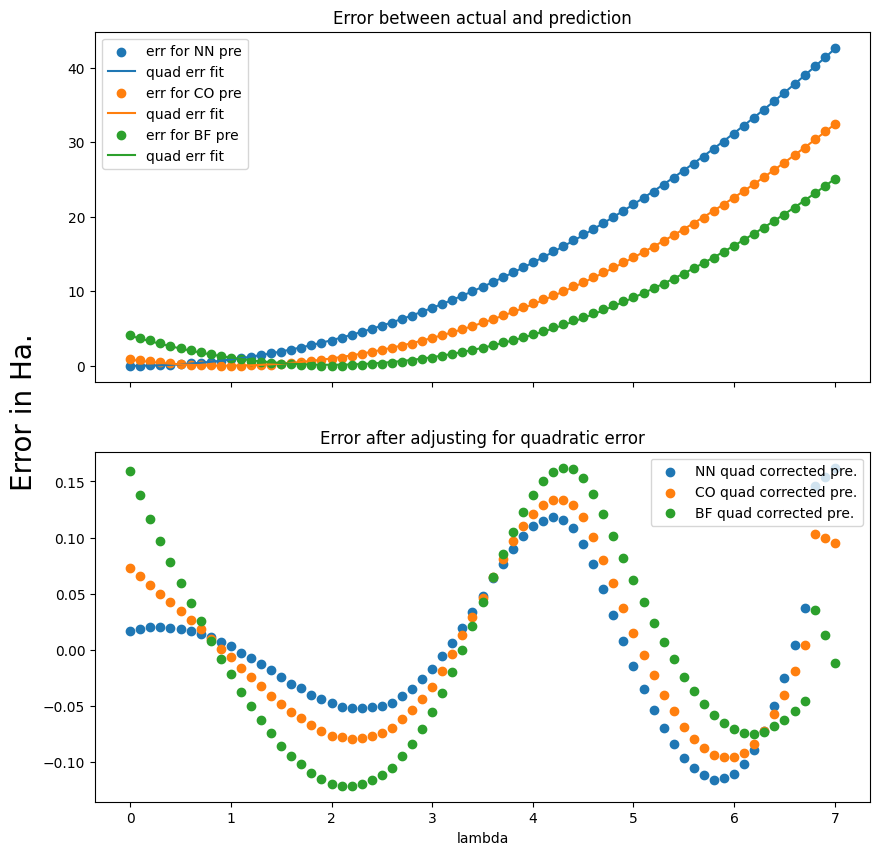

In [7]:
a = 1
plot_quad_errors()

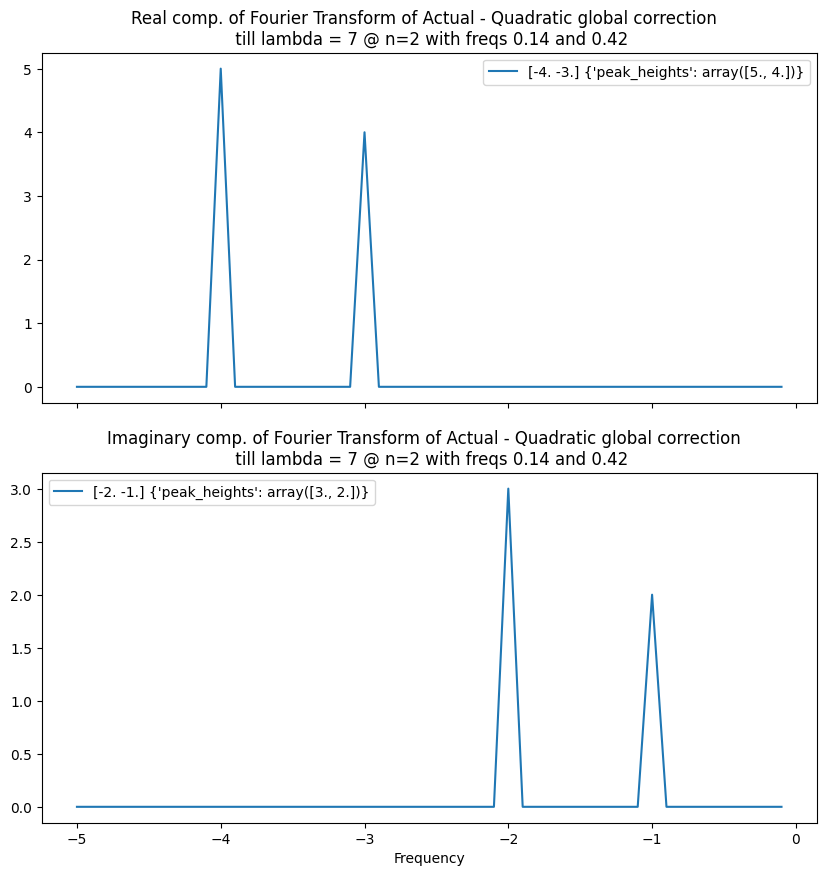

In [8]:
# testing hypothesis about real and imaginary parts of FT
time  = np.linspace(0,10,100,endpoint=False)
s1 = 2*np.sin(2 * np.pi * 1 * time)
s2 = 3*np.sin(2 * np.pi * 2 * time)
c1 = 4*np.cos(2 * np.pi * 3 * time)
c2 = 5*np.cos(2 * np.pi * 4 * time)

data = c1 + c2 + s1 + s2
N = len(data)  # Number of data points
normalization = 2 / N
fft_data = normalization * np.fft.fft(data)
sampling_rate = 10  # S10 data points per lambda
frequencies = np.fft.fftfreq(N, d = 1/ sampling_rate)

# Shift the frequencies to have 0 at the center
frequencies = np.fft.fftshift(frequencies)[:N//2]
fft_data = np.fft.fftshift(fft_data)[:N//2]


fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# # find peaks in fft_data and get the corresponding frequencies
peaks_r = find_peaks(np.real(fft_data), height = 0.4)
peaks_i = find_peaks(np.imag(fft_data), height = 0.4)

ax[0].plot(frequencies, np.real(fft_data), label=f'{frequencies[peaks_r[0]]} {peaks_r[1]}')

ax[1].plot(frequencies, np.imag(fft_data),label=f'{frequencies[peaks_i[0]]} {peaks_i[1]}')
ax[1].set_xlabel('Frequency')
ax[1].set_title('Imaginary comp. of Fourier Transform of Actual - Quadratic global correction  \n till lambda = 7 @ n=2 with freqs 0.14 and 0.42')
ax[1].legend()
ax[0].set_title('Real comp. of Fourier Transform of Actual - Quadratic global correction  \n till lambda = 7 @ n=2 with freqs 0.14 and 0.42')
ax[0].legend()

In [9]:
import sys, os
sys.path.append('/Users/meet/Desktop/Courses/Research/Chem/Code/QA/g_modules')
sys.path.append('/Users/meet/Desktop/Courses/Research/Chem/Code/QA/m_modules')
# Add the parent directory to the system path
sys.path.append('/Users/meet/Desktop/Courses/Research/Chem/Code/QA')

from pyscf import gto,scf, cc
import numpy as np
import pyscf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import basis_set_exchange as bse
from g_modules.FcMole import FcM, FcM_like
from g_modules.AP_class import APDFT_perturbator as AP
from g_modules.alch_deriv import first_deriv_elec,DeltaV
from m_modules.stat_funcs import *
from scipy.optimize import curve_fit
import numpy.fft as fft
from scipy.signal import find_peaks
from scipy.stats import pearsonr
from m_modules.energy import *
from m_modules.config import *
import json

In [10]:
NN = gto.M(atom= f"6 0 0 0; 8 0 0 {d}",unit="Bohr",basis='unc-ccpvdz')

In [11]:
mf_NN, e_NN = new_mol(NN, 7/3, 0,0)[1],new_mol(NN,7/3, 0,0)[2]

In [12]:
e_NN

-136.056